# Web Scraping with BeautifulSoup Cacao Rating Example

## Import Packages

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Turn Webpage into BeautifulSoup

In [3]:
## Get Webpage
webpage = requests.get("https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html")
## Turn it into some BeautifulSoup
soup = BeautifulSoup(webpage.content, "html.parser")

## Analyze Ratings

### Preprocess Data

In [5]:
## Find all the Ratings from the class Rating
tags = soup.find_all(attrs = {"class": "Rating"})
## Create a list of all the Ratings and convert to floats
ratings = []
for rate in tags[1:]:
  #Alternate to tags[1:]
 # if rate.get_text() == "Rating":
 #   continue
 # else:
    string = rate.get_text()
    ratings.append(pd.to_numeric(string))

### Stats for Ratings

In [23]:
## Mean, St. Dev., Median, and Mode
print("Mean Rating", np.mean(ratings))
  #3.19
print("Rating Standard Deviation", np.std(ratings))
  #.48
print("Median Rating",np.median(ratings))
  #3.25
print("Mode Rating", stats.mode(ratings))
  #3.5

Mean Rating 3.185933147632312
Rating Standard Deviation 0.47792921002236244
Median Rating 3.25
Mode Rating ModeResult(mode=array([3.5]), count=array([392]))


### Histogram of Ratings

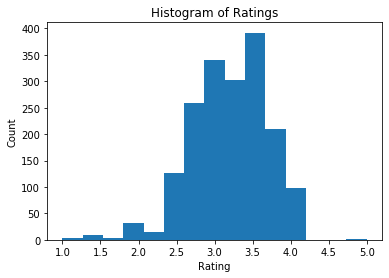

In [7]:
## Histogram of Ratings
plt.hist(ratings, range = (1,5), bins = 15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Histogram of Ratings")
plt.show()

### Analyze Company Name and Rating Dataframe

In [9]:
## Create Company Name and Rating DataFrame
comp_tags = soup.select(".Company")
comp_names = []
for comp in comp_tags[1:]:
    comp_names.append(comp.get_text())
df = pd.DataFrame.from_dict({'Company': comp_names, "Ratings": ratings})
avg_comp = df.groupby("Company").Ratings.mean()

# Top Ten Companies with Highest Mean Ratings
print("Top Ten Companies with Highest Mean Ratings:", "\n", avg_comp.nlargest(10))

Top Ten Companies with Highest Mean Ratings: 
 Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


### Cocoa Percentage Analysis

In [24]:
## Cocoa Percent Analysis
cocoa = soup.select(".CocoaPercent")
cocoa_percent = []
for percent in cocoa[1:]:
    string = percent.get_text()
    clean = string.replace("%", "")
    ready = pd.to_numeric(clean)
    cocoa_percent.append(ready)
df["CocoaPercentage"] = cocoa_percent

### Cocoa Percentage Graph

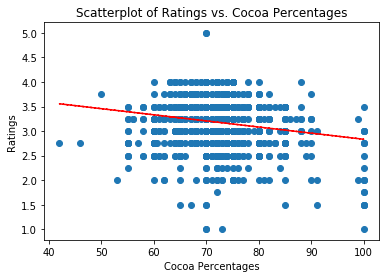

In [11]:
## Scatterplot of ratings and cocoa percents
plt.clf()
plt.scatter(df.CocoaPercentage, df.Ratings)
plt.title("Scatterplot of Ratings vs. Cocoa Percentages")
plt.xlabel("Cocoa Percentages")
plt.ylabel("Ratings")
z = np.polyfit(df.CocoaPercentage, df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show()

There is a slightly negative correlation between cocoa percentages and the ratings so that a higher percentage will mean a slightly lower score.

### Origins Analysis

In [27]:
## The Highest Rated Bar Origins
origin = soup.select(".Origin")
bar_origin = []
for bar in origin[1:]:
  bar_origin.append(bar.get_text())
df["BarOrigin"] = bar_origin
avg_bar_origin = df.groupby(["BarOrigin", "Company"]).Ratings.mean()
best_bar_in_the_world = avg_bar_origin.nlargest(1)
print("Best chocolate bar in the world", "\n", best_bar_in_the_world)
print()
print("Top Chocolate Bars and Company", "\n", avg_bar_origin.nlargest(10))

Best chocolate bar in the world 
 BarOrigin  Company
Chuao      Amedei     5.0
Name: Ratings, dtype: float64

Top Chocolate Bars and Company 
 BarOrigin                                    Company                
Chuao                                        Amedei                     5.000000
Toscano Black                                Amedei                     4.166667
ABOCFA Coop                                  Georgia Ramon              4.000000
Alto Beni, Cru Savage                        Felchlin                   4.000000
Asante                                       Scharffen Berger           4.000000
Bachelor's Hall E., St. Thomas Parish        Soma                       4.000000
Bali, Sukrama Bros. Farm, Melaya, 62hr C     Benoit Nihant              4.000000
Bellavista Coop, #225, LR, MC, CG Exclusive  Fresco                     4.000000
Brazil                                       L.A. Burdick (Felchlin)    4.000000
Cabosse                                      Pierre Marcoli

### Review Date Analysis

In [13]:
# Review Date Analysis
date = soup.select(".ReviewDate")
review_date = []
for review in date[1:]:
    string = review.get_text()
    ready = pd.to_numeric(string)
    review_date.append(ready)
df["ReviewDate"] = review_date

### Review Date Graph

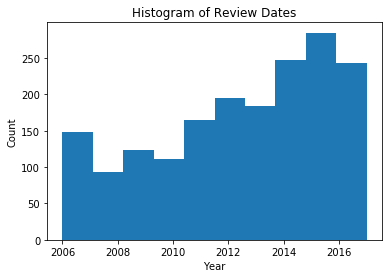

In [14]:
plt.clf()
plt.hist(df.ReviewDate)
plt.title("Histogram of Review Dates")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

### Company Location Analysis

In [15]:
##Company Location Analysis
location = soup.select(".CompanyLocation")
company_location = []
for comp in location[1:]:
  company_location.append(comp.get_text())
df["CompanyLocation"]= company_location
avg_comp_location = df.groupby("CompanyLocation").Ratings.mean()
print("Top Ten Company Locations")
print(avg_comp_location.nlargest(10))

Top Ten Company Locations
CompanyLocation
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Australia      3.357143
Guatemala      3.350000
Name: Ratings, dtype: float64


### Bean Type Analysis

In [16]:
# Bean Type Analysis
bean_ty = soup.select(".BeanType")
bean_type = []
for bean in bean_ty[1:]:
  bean_type.append(bean.get_text())
df["BeanType"] = bean_type
avg_bean_type = df.groupby("BeanType").Ratings.mean()
print("Top Ten Bean Types")
print(avg_bean_type.nlargest(10))

Top Ten Bean Types
BeanType
                            4.000
Criollo (Ocumare 67)        4.000
Criollo (Wild)              4.000
Trinitario (85% Criollo)    3.875
Amazon mix                  3.750
Blend-Forastero,Criollo     3.750
Criollo (Ocumare 77)        3.750
Forastero (Amelonado)       3.750
Trinitario, Nacional        3.750
Trinitario, TCGA            3.750
Name: Ratings, dtype: float64


### Broad Bean Origin Analysis

In [17]:
# Broad Bean Origin Analysis
broad_bean_origin = soup.select(".BroadBeanOrigin")
broad_origin = []
for bean in broad_bean_origin[1:]:
  broad_origin.append(bean.get_text())
df["BroadBeanOrigin"] = broad_origin
avg_broad_origin = df.groupby("BroadBeanOrigin").Ratings.mean()
best_broad_origins = avg_broad_origin.nlargest(10)
print("Top Ten Broad Bean Origins")
print(best_broad_origins)

Top Ten Broad Bean Origins
BroadBeanOrigin
Dom. Rep., Madagascar           4.00
Gre., PNG, Haw., Haiti, Mad     4.00
Guat., D.R., Peru, Mad., PNG    4.00
Peru, Dom. Rep                  4.00
Ven, Bolivia, D.R.              4.00
Venezuela, Java                 4.00
DR, Ecuador, Peru               3.75
Dominican Rep., Bali            3.75
PNG, Vanuatu, Mad               3.75
Peru, Belize                    3.75
Name: Ratings, dtype: float64


## Find the Best Dark Chocolate Bar

Dark chocolate is known to be the best chocolate for your health.  Let's try to find the highest rated dark chocolate.  Dark chocolate is usually classified by a percentage of 70% or above.

In [30]:
## Get a dataframe of only dark chocolates
dark = df.loc[(df['CocoaPercentage'] >= 70.0)]
#print(dark)

## Find the highest rated dark chocolates
dark_avg_bar_origin = dark.groupby(["BarOrigin", "Company"]).Ratings.mean()
best_dark_bar_in_the_world = dark_avg_bar_origin.nlargest(1)
print("Best Dark Chocolate Bar in the World", "\n", best_dark_bar_in_the_world)
print()
best_dark_bars_in_the_world = dark_avg_bar_origin.nlargest(10)
print("Top Ten Best Dark Chocolate Bars in the World", "\n",best_dark_bars_in_the_world )

Best Dark Chocolate Bar in the World 
 BarOrigin  Company
Chuao      Amedei     5.0
Name: Ratings, dtype: float64

Top Ten Best Dark Chocolate Bars in the World 
 BarOrigin                                    Company                
Chuao                                        Amedei                     5.0
Toscano Black                                Amedei                     5.0
ABOCFA Coop                                  Georgia Ramon              4.0
Bachelor's Hall E., St. Thomas Parish        Soma                       4.0
Bali, Sukrama Bros. Farm, Melaya, 62hr C     Benoit Nihant              4.0
Bellavista Coop, #225, LR, MC, CG Exclusive  Fresco                     4.0
Brazil                                       L.A. Burdick (Felchlin)    4.0
Cabosse                                      Pierre Marcolini           4.0
Camino Verde                                 Smooth Chocolator, The     4.0
Carenero Superior, Urrutia, Barlovento       Idilio (Felchlin)          4.0
Name: Ra